In [1]:
import gsw, time, datetime, sys, os, glob, xgcm, matplotlib, xarray as xr, numpy as np, dask.array as da, pandas as pd, cartopy.crs as ccrs
import matplotlib.patches as patches, cmocean
from scipy import signal, fft
import xrft
import cartopy.mpl.ticker as cticker, string
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm, TwoSlopeNorm
import matplotlib.pyplot as plt, matplotlib.colors as colors, matplotlib.dates as mdates

In [2]:
scales = [5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 50, 75, 100, 125, 150, 175]

pi_BMs_coas=[]
pi_BMs_ocean_forced=[]

for i in range(len(scales)):
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_BMs_coas.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())
    
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_BMs/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_BMs_ocean_forced.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())    

pi_BMs_coas = np.array(pi_BMs_coas)
pi_BMs_ocean_forced = np.array(pi_BMs_ocean_forced)

/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_5km_pi.nc


/home/fcampos/miniconda3/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'argo' loading failed:
cannot import name 'resolve_auth_type' from 'botocore.auth' (/home/fcampos/miniconda3/lib/python3.11/site-packages/botocore/auth.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_BMs/filter_5km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_BMs/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_BMs/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_BMs/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_BMs/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_10km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_BMs/filter_10km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filter_12km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_BMs/filter_12km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_BMs/filte

In [10]:
scales = [5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 50, 75, 100, 125, 150, 175]

pi_tot_coas=[]
pi_tot_ocean_forced=[]

for i in range(len(scales)):
    file = "/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/coas_tot_03/filter_"+str(scales[i])+"km.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_tot_coas.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())
    
    file = "/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/ocean_forced_tot_03/filter_"+str(scales[i])+"km.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_tot_ocean_forced.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())    

pi_tot_coas = np.array(pi_tot_coas)
pi_tot_ocean_forced = np.array(pi_tot_ocean_forced)

/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/coas_tot_03/filter_5km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/ocean_forced_tot_03/filter_5km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/coas_tot_03/filter_6km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/ocean_forced_tot_03/filter_6km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/coas_tot_03/filter_7km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/ocean_forced_tot_03/filter_7km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/coas_tot_03/filter_8km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/ocean_forced_tot_03/filter_8km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/coas_tot_03/filter_9km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/ocean_forced_tot_03/filter_9km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/coas_tot_03/filter_10km.nc
/media/fcampos/DATA_SAVE/data_fernando/data_netcdf/ocean_forced_tot_03/filter_10km.nc
/media/fcampos/DATA_SAVE/d

In [4]:
scales = [5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 50, 75, 100, 125, 150, 175]

pi_IGWs_coas=[]
pi_IGWs_ocean_forced=[]

for i in range(len(scales)):
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi/coas_IGWs/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_IGWs_coas.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())
    
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_IGWs/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_IGWs_ocean_forced.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())    

pi_IGWs_coas = np.array(pi_IGWs_coas)
pi_IGWs_ocean_forced = np.array(pi_IGWs_ocean_forced)

/media/fcampos/DATA_SAVE/data_fernando/pi/coas_IGWs/filter_5km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_IGWs/filter_5km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_IGWs/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_IGWs/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_IGWs/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_IGWs/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_IGWs/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_IGWs/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_IGWs/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_IGWs/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_IGWs/filter_10km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forced_IGWs/filter_10km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/coas_IGWs/filter_12km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi/ocean_forc

In [5]:
scales = [5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 50, 75, 100, 125, 150, 175]

pi_BMs_coas_filt=[]
pi_BMs_ocean_forced_filt=[]

for i in range(len(scales)):
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_BMs_time_filt/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_BMs_coas_filt.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())
    
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_BMs_time_filt/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_BMs_ocean_forced_filt.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())    

pi_BMs_coas_filt = np.array(pi_BMs_coas_filt)
pi_BMs_ocean_forced_filt = np.array(pi_BMs_ocean_forced_filt)

/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_BMs_time_filt/filter_5km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_BMs_time_filt/filter_5km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_BMs_time_filt/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_BMs_time_filt/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_BMs_time_filt/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_BMs_time_filt/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_BMs_time_filt/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_BMs_time_filt/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_BMs_time_filt/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_BMs_time_filt/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_BMs_time_filt/filter_10km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt

In [6]:
scales = [5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 50, 75, 100, 125, 150, 175]

pi_IGWs_coas_filt=[]
pi_IGWs_ocean_forced_filt=[]

for i in range(len(scales)):
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_IGWs_time_filt/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_IGWs_coas_filt.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())
    
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_IGWs_time_filt/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_IGWs_ocean_forced_filt.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())    

pi_IGWs_coas_filt = np.array(pi_IGWs_coas_filt)
pi_IGWs_ocean_forced_filt = np.array(pi_IGWs_ocean_forced_filt)

/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_IGWs_time_filt/filter_5km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_IGWs_time_filt/filter_5km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_IGWs_time_filt/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_IGWs_time_filt/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_IGWs_time_filt/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_IGWs_time_filt/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_IGWs_time_filt/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_IGWs_time_filt/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_IGWs_time_filt/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_IGWs_time_filt/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_IGWs_time_filt/filter_10km_pi.nc
/media/fcampos/DATA_SAVE/data_ferna

In [7]:
scales = [5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 50, 75, 100, 125, 150, 175]

pi_tot_coas_filt=[]
pi_tot_ocean_forced_filt=[]

for i in range(len(scales)):
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_tot_time_filt/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_tot_coas_filt.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())
    
    file = "/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_tot_time_filt/filter_"+str(scales[i])+"km_pi.nc"
    print(file)
    ds = xr.open_mfdataset(file,parallel=True).squeeze()
    pi_tot_ocean_forced_filt.append(ds["Pi"][24*2:-24*2,25:-25,25:-25].mean())    

pi_tot_coas_filt = np.array(pi_tot_coas_filt)
pi_tot_ocean_forced_filt = np.array(pi_tot_ocean_forced_filt)

/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_tot_time_filt/filter_5km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_tot_time_filt/filter_5km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_tot_time_filt/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_tot_time_filt/filter_6km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_tot_time_filt/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_tot_time_filt/filter_7km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_tot_time_filt/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_tot_time_filt/filter_8km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_tot_time_filt/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/ocean_forced_tot_time_filt/filter_9km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt/coas_tot_time_filt/filter_10km_pi.nc
/media/fcampos/DATA_SAVE/data_fernando/pi_filt

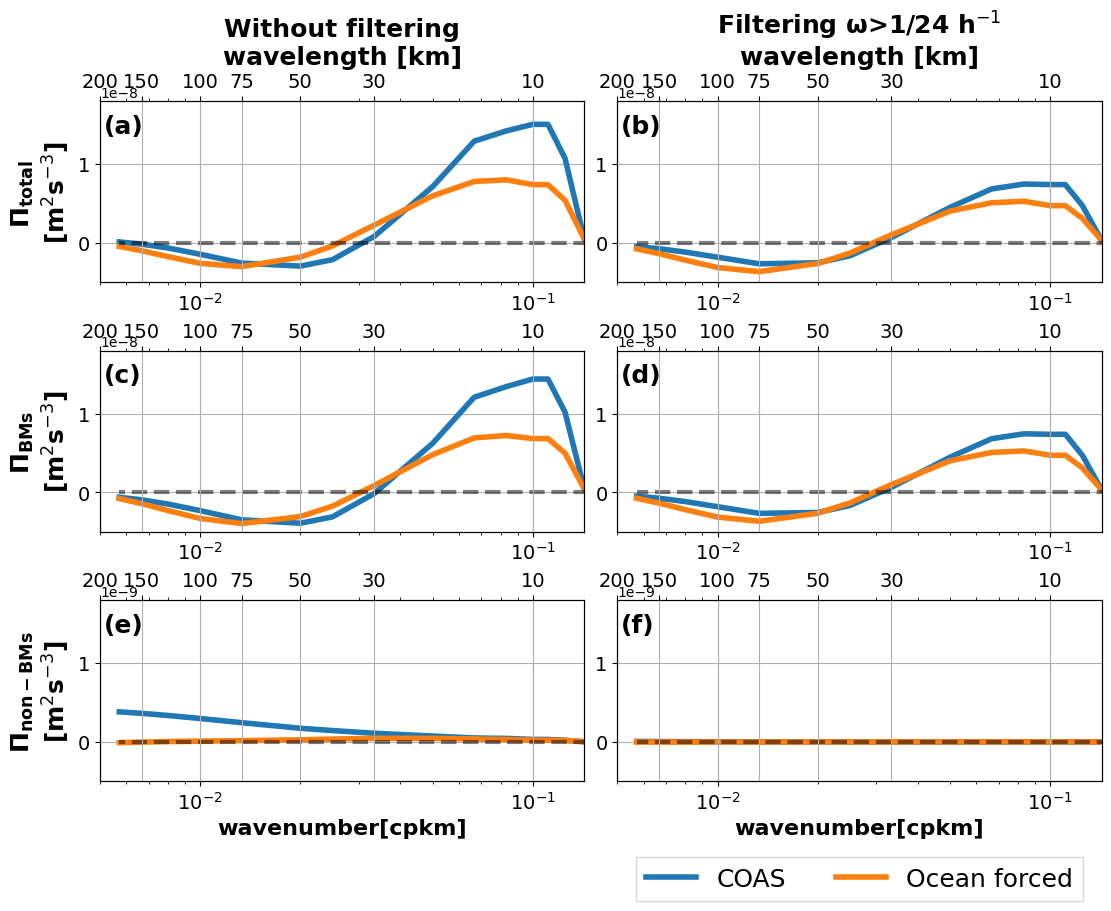

In [15]:
fig, ax = plt.subplots(3,2, figsize=(11,9),constrained_layout=True, )
ax[0,0].plot(1/np.array(scales),pi_tot_coas,color='#1f77b4', linewidth=4)
ax[0,0].plot(1/np.array(scales),pi_tot_ocean_forced,color='#ff7f0e', linewidth=4)

ax[1,0].plot(1/np.array(scales),pi_BMs_coas,color='#1f77b4', linewidth=4)
ax[1,0].plot(1/np.array(scales),pi_BMs_ocean_forced,color='#ff7f0e', linewidth=4)

ax[2,0].plot(1/np.array(scales),pi_IGWs_coas,color='#1f77b4', linewidth=4)
ax[2,0].plot(1/np.array(scales),pi_IGWs_ocean_forced,color='#ff7f0e', linewidth=4)

ax[0,1].plot(1/np.array(scales),pi_tot_coas_filt,color='#1f77b4', linewidth=4)
ax[0,1].plot(1/np.array(scales),pi_tot_ocean_forced_filt,color='#ff7f0e', linewidth=4)

ax[1,1].plot(1/np.array(scales),pi_BMs_coas_filt,color='#1f77b4', linewidth=4)
ax[1,1].plot(1/np.array(scales),pi_BMs_ocean_forced_filt,color='#ff7f0e', linewidth=4)

ax[2,1].plot(1/np.array(scales),pi_IGWs_coas_filt,color='#1f77b4', linewidth=4, label="COAS")
ax[2,1].plot(1/np.array(scales),pi_IGWs_ocean_forced_filt,color='#ff7f0e', linewidth=4, label = "Ocean forced")

ax[0,0].set_ylabel("$\mathbf{\Pi_{total}}$ \n[m$^{2}$s$^{-3}$]",fontweight="bold",fontsize=18)
ax[1,0].set_ylabel("$\mathbf{\Pi_{BMs}}$ \n[m$^{2}$s$^{-3}$]",fontweight="bold",fontsize=18)
ax[2,0].set_ylabel("$\mathbf{\Pi_{non-BMs}}$ \n[m$^{2}$s$^{-3}$]",fontweight="bold",fontsize=18)
ax[2,1].legend(loc='upper center', fontsize=18, ncol=2, fancybox=False, shadow=False, bbox_to_anchor=(0.5, -0.35))

ax[0,0].set_title("Without filtering\nwavelength [km]",fontweight="bold",fontsize=18)
ax[0,1].set_title("Filtering $\mathbf{\omega}$>1/24 h$^{-1}$\nwavelength [km]",fontweight="bold",fontsize=18)

ax[2,0].set_xlabel("wavenumber[cpkm]",fontweight="bold",fontsize=16)
ax[2,1].set_xlabel("wavenumber[cpkm]",fontweight="bold",fontsize=16)

alphabet, num = string.ascii_lowercase, 0

for j in range(2):
    ax[0,j].text(1/195,1.4e-8, "("+str(alphabet[num])+")", fontweight="bold", color="black", fontsize=18)
    ax[1,j].text(1/195,1.4e-8, "("+str(alphabet[num+2])+")", fontweight="bold", color="black", fontsize=18)
    ax[2,j].text(1/195,1.4e-9, "("+str(alphabet[num+4])+")", fontweight="bold", color="black", fontsize=18)
    num=num+1

for i in range(3):
    for j in range(2):
        ax[i,j].set_ylim(-5e-9,1.8e-8)
        if i==2:
            ax[i,j].set_ylim(-5e-10,1.8e-9)
        ax[i,j].set_xlim(1/200,1/7)
        ax[i,j].set_xscale("log")
        ax[i,j].grid()
        ax[i,j].plot(1/np.array(scales),0/np.array(scales),"--", color="black", alpha=0.5, linewidth=3)
        ax1a = ax[i,j].twiny()
        ax1a.set_xlim(1/200,1/7)
        ax1a.set_xscale('log')
        ax1a.set_xticks([1/200,1/150,1/100,1/75,1/50,1/30,1/10])
        ax1a.set_xticklabels(['200','150','100','75','50',"30",'10'])
        ax1a.grid()
        ax1a.tick_params(axis="both", labelsize=14)
        ax[i,j].tick_params(axis="both", labelsize=14)
        ax[i,j].set_rasterization_zorder(0)

plt.savefig("./figure_11.pdf", dpi=500)             

In [11]:
np.min(pi_tot_coas_filt), np.min(pi_tot_ocean_forced_filt), np.min(pi_BMs_coas_filt), np.min(pi_BMs_ocean_forced_filt)

(-2.6577956685561997e-09,
 -3.6603069598610335e-09,
 -2.664377530771033e-09,
 -3.6728682146702237e-09)

In [12]:
np.min(pi_tot_coas), np.min(pi_tot_ocean_forced), np.min(pi_BMs_coas), np.min(pi_BMs_ocean_forced)

(-7.289709968641804e-09,
 -8.588299883216016e-09,
 -3.9201021232061145e-09,
 -3.961833001668273e-09)

In [14]:
np.min(pi_tot_coas_filt)/np.min(pi_tot_coas), np.min(pi_tot_ocean_forced_filt)/np.min(pi_tot_ocean_forced)

(0.3645955298618543, 0.42619692018606803)